Code for quickly plotting raw GIWAXS data.

- Any comments labelled `#!!! ... !!!` mean you need to change something to suit your specific data.
- The variable labelled `files` requires you to change the file extension; for the ESRF, the filetype is usually .edf, and for Diamond Light Source is .tif
- The intensity values are important so try playing around with them to get the best view of features of interest
- The colour scheme can also be changed by changing the variable `cmap` [https://matplotlib.org/stable/users/explain/colors/colormaps.html]

In [22]:
import fabio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

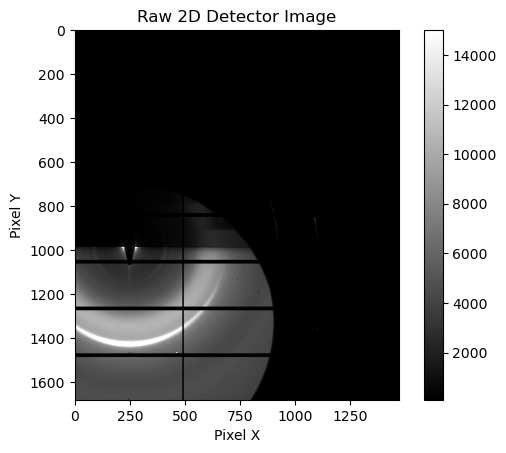

In [25]:
# this cell is to plot an individual detector image (no reshaping)

# file path to image you want to plot
# include filename and extension
image = fabio.open("/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230429-3-MINERVA_DCV5T_HT/long_exposure/p2mImage1019682.tif")  # Replace with the actual path to your image file
data = image.data  

# you will need to change these!
vmin = 100  # min intensity value
vmax = 15000  # max intensity value

# for long exposure images (t ~ 30 s) vmax ~ 15000
# for short exposure images (t ~ 3 s) vmax ~ 1000

plt.imshow(data, cmap='gray', vmin=vmin, vmax=vmax)
plt.colorbar()
# plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('Raw 2D Detector Image')
plt.show()

# sorry if you get the error about Arial font ...

In [19]:
# check you're in the right folder 

# lists all the files in a directory and puts them in numerical order
# if you don't do this sorting step it'll just plot them in a random order

# paste your folder path here with a set of samples you want to look at
# NB for Linux, folderpath convention different than Windows
folder_path = r"/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230429-3-MINERVA_DCV5T_HT/long_exposure"

# !!! change '.tif' to '.edf' for ESRF files (vice versa for Diamond) !!!
files = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename)) and filename.endswith('.tif')]
sorted_files = sorted(files, key=lambda x: int(x.split("p2mImage")[1].split(".")[0]))
# !!! the above line of code splits the text part of the filename away from the numerical part !!!
# !!! so you will need to replace the 'p2mImage' part with whatever your files are named !!!

for filename in sorted_files:
    print(filename)

p2mImage1019282.tif
p2mImage1019375.tif
p2mImage1019426.tif
p2mImage1019492.tif
p2mImage1019541.tif
p2mImage1019585.tif
p2mImage1019630.tif
p2mImage1019682.tif


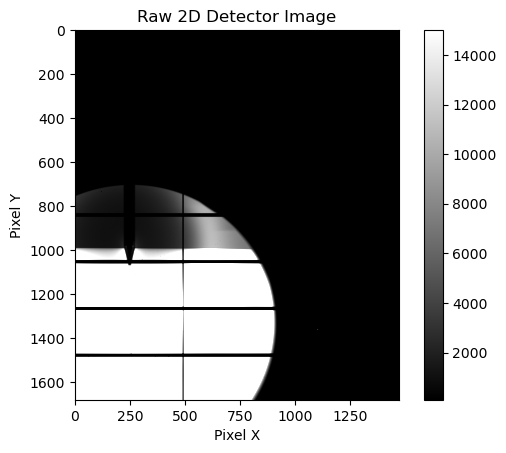

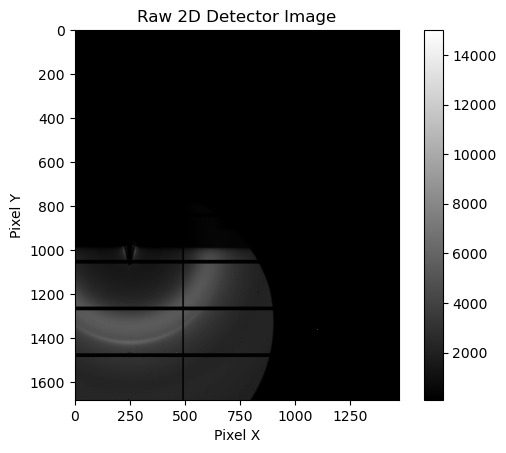

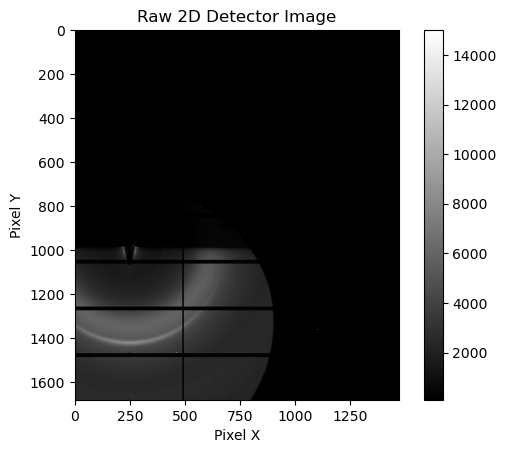

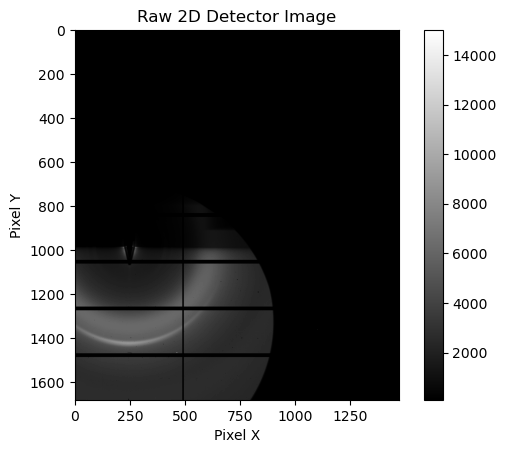

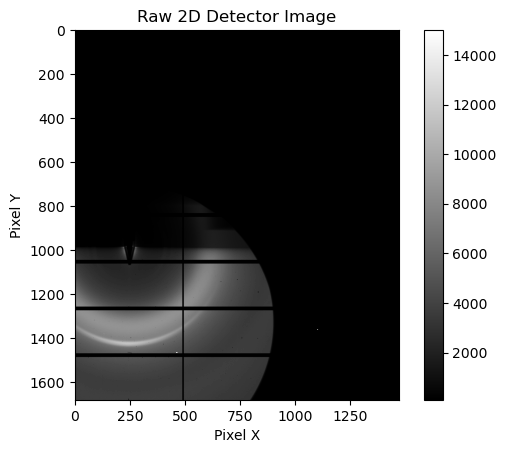

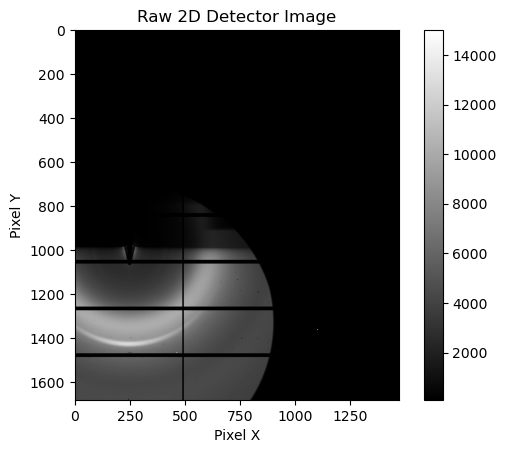

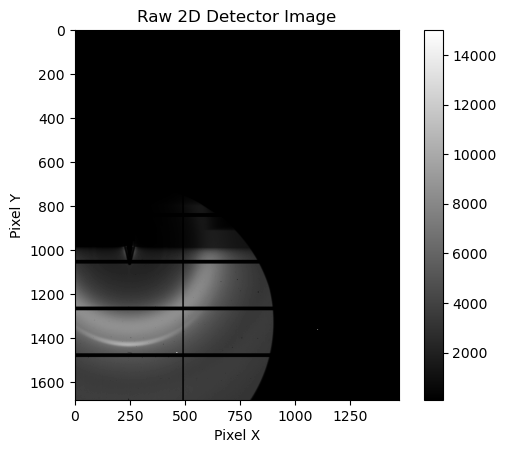

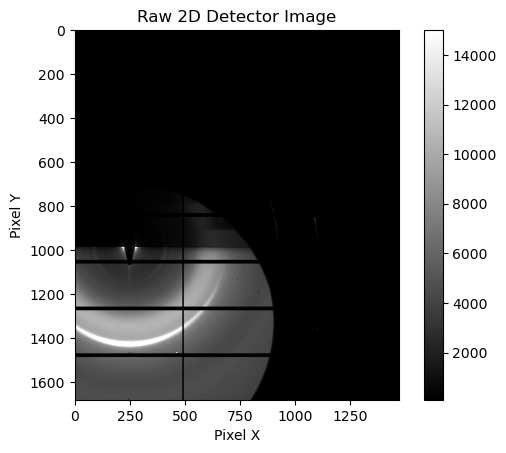

In [26]:
image_files = [os.path.join(folder_path, filename) for filename in sorted_files]

def display_images():
    vmin = 100  
    vmax = 15000  
# !!! don't forget to change intensity values !!!    
    for image_path in image_files:
        image = fabio.open(image_path)
        data = image.data  
        
        plt.imshow(data, cmap='gray', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.xlabel('Pixel X')
        plt.ylabel('Pixel Y')
        plt.title('Raw 2D Detector Image')
        plt.show()

display_images()
